In [1]:
# Manipulação dos Dados
import numpy as np
import pandas as pd
import json
 
# Visualização dos Dados
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine Learning

In [2]:
df_artists = pd.read_csv('artists.csv')

In [3]:
df_tracks = pd.read_csv('tracks.csv')

In [4]:
with open('dict_artists.json', 'r') as f:
  data = json.load(f)

related_artists = pd.DataFrame().from_dict(data, orient='index').reset_index()
related_artists.rename(columns={'index' : 'id_artist'}, inplace=True)

# DataFrame **Artists**

In [5]:
df_artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [6]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


'FOLLOWERS' É A ÚNICA COLUNA COM VALORES NaN

In [7]:
df_artists.describe()

,followers,popularity
count,1.104336e+06,1.104349e+06
mean,1.074304e+04,9.083884e+00
std,2.609554e+05,1.376310e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.900000e+01,2.000000e+00
75%,4.510000e+02,1.400000e+01
max,7.890023e+07,1.000000e+02


In [8]:
df_artists[df_artists.duplicated()]

,id,followers,genres,name,popularity


In [9]:
# Antes de tudo, vamos ordenar o df_artists de acordo com o nome dos artistas

df_artists.sort_values(by='name').reset_index(drop=True, inplace=True)

MATRIZ DE CORRELAÇÃO DENTRE AS VARIÁVEIS DO *df_artists*

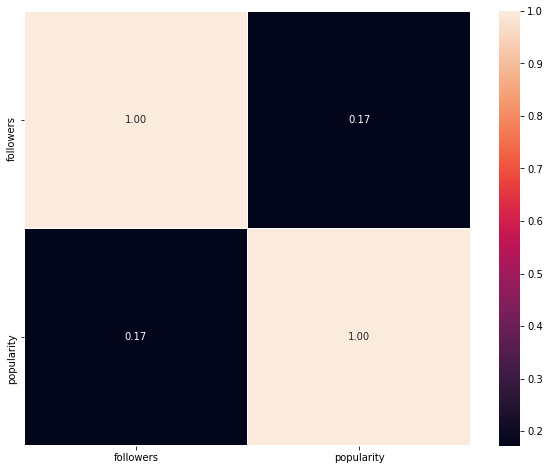

In [10]:
matrix_artists = df_artists.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix_artists, annot=True, linewidths=0.5, fmt=".2f")

# - artist id: *hash* que identifica o artista

In [11]:
df_artists['id'].nunique()

1104349

In [12]:
type(df_artists['id'][0])

str

In [13]:
# O Dtype da coluna foi convertido para String, para ser usado nas próximas etapas

df_artists['id'] = df_artists['id'].astype('string')

**Conclusões**

1.   Cada artista possui um id único


# - artist followers: quantidade de seguidores que o artista tem


TRATANDO VALORES FALTANTES

In [14]:
df_artists.loc[df_artists['followers'].isnull()]

,id,followers,genres,name,popularity
444199,7F71W80jaXFARK7hBjsDI2,NaN,['czech pop'],Marcell,36
444200,3MLHJz04KmEVzCTPclzkEm,NaN,['czech pop'],Niko,21
444797,0cqZsULDZdJTGA4Zqh8Ckv,NaN,[],Savzilla,0
444798,0BuknWzKujyc9HfZ1V50Uk,NaN,[],Duck Doja,0
446635,6ltU5gIDLmWNYaVNHnll5G,NaN,['mexican electronic'],Zofa,0
446636,7C9nWRMbRqpPUuKh2OEw9n,NaN,[],MHV,3
446637,41c30F8zy5UCTSevbn0WfD,NaN,['mexican electronic'],Broadband Star,0
468525,1DK979aOesiZ4Vkus8txqu,NaN,[],AmorArtis Orchestra & Johannes Somary,2
468526,6jkpqSWWsXSuqtsoeAiMDU,NaN,['uk americana'],Police Dog Hogan,14
468527,7aMdHPv79qOuqqBD6TnaCp,NaN,[],"Miles Davis & Charlie ""Bird"" Parker",0


Como temos poucos artistas com valores faltantes no item de Seguidores, será pesquisado os valores reais manualmente na plataforma, e os incluiremos a seguir:

In [15]:
spotify_followers = {'Marcell' : 344839, 'Niko' : 467, 'Savzilla' : 16, 'Duck Doja' : 10, 
                     'Zofa' : 7, 'MHV' : 117, 'Broadband Star' : 9, 'AmorArtis Orchestra & Johannes Somary' : 15, 
                     'Police Dog Hogan' : 1081, 'Miles Davis & Charlie "Bird" Parker' : 12461, 'Black Dog Prowl' : 198, 
                     'Band of the Fifteenth Field Artillery Regiment, RCA': 27, 'Robert Steven Williams' : 7}

In [16]:
df_artists['followers'] = df_artists['followers'].fillna(df_artists['name'].map(spotify_followers))

In [17]:
df_artists['followers'].isnull().any()

False

Os dados serão convertidos para int, visto que não existem Seguidores decimais

In [18]:
df_artists['followers'] = df_artists['followers'].astype('int')

IDENTIFICANDO OS OUTLIERS

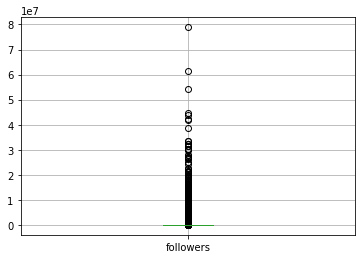

In [19]:
df_artists.boxplot(column=['followers'])

In [20]:
df_artists['followers'].describe()

count    1.104349e+06
mean     1.074324e+04
std      2.609541e+05
min      0.000000e+00
25%      1.000000e+01
50%      5.900000e+01
75%      4.510000e+02
max      7.890023e+07
Name: followers, dtype: float64

In [21]:
q1 = df_artists['followers'].quantile(0.25)
q3 = df_artists['followers'].quantile(0.75)

IQR = q3 - q1

followers_outliers = q3 + 1.5 * IQR
followers_outliers

1112.5

In [22]:
len(df_artists[df_artists['followers'] >= 1113])

187927

In [23]:
df_artists.loc[df_artists['followers'] == df_artists['followers'].max()]

,id,followers,genres,name,popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,78900234,"['pop', 'uk pop']",Ed Sheeran,92


ANÁLISE DA QUANTIDADE DE SEGUIDORES

In [24]:
df_artists['followers'].value_counts().sort_values(ascending=False).head(15)

0     67875
1     35979
2     27956
3     24906
4     22155
5     20162
6     18299
7     17019
8     15909
9     14668
10    13579
11    12925
12    11785
13    11583
14    10641
Name: followers, dtype: int64

*   Ao agruparmos os artistas com base na quantidade de seus seguidores, percebe-se uma tendência de que, quanto MAIS seguidores, MENOS artistas semelhantes (sendo que o maior conjunto de artistas é aquele com zero seguidores)
*   Analisaremos isso graficamente



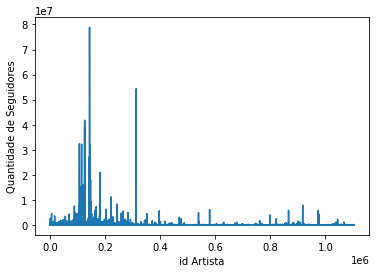

In [25]:
df_artists['followers'].plot(xlabel='id Artista', ylabel='Quantidade de Seguidores')

*   O dataset contém artistas com quantidade de seguidores muito diversos entre si (de 0 a 70MM+).
*   Assim, para um melhor entendimento do todo, a visualização da quantidade de seguidores será fracionada

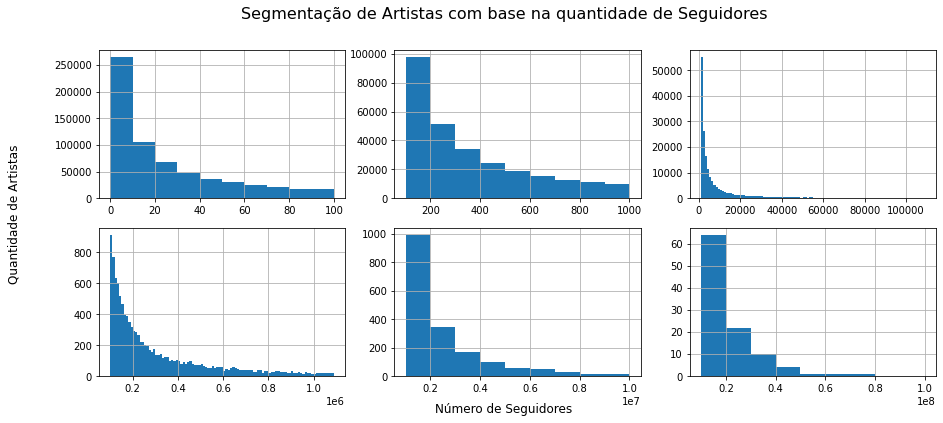

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
ax = axs.ravel()

fig.suptitle('Segmentação de Artistas com base na quantidade de Seguidores', fontsize=16)
fig.text(0.5, 0.04, 'Número de Seguidores', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Quantidade de Artistas', va='center', rotation='vertical', fontsize=12)

ranges = [range(0, 110, 10), range(100, 1100, 100), 
          range(1000, 110000, 1000), range(100000, 1100000, 10000), 
          range(1000000, 11000000, 1000000), range(10000000, 110000000, 10000000)]

for i in range(6):
  df_artists['followers'].hist(bins=ranges[i], ax=ax[i])

plt.show()

**Conclusões**

1.   Considerando os quartis no método *describe*, identificamos que 25% de todo o dataset possui até 10 seguidores
2.   75% dos artistas possuem até 451 seguidores
3.   Os demais artistas (25%) constam com uma quantidade "desproporcional" aos demais, chegando a terem mais de 78 milhões, como é o caso de Ed Sheeran
4.   Identificamos, então, que 187.927 são outliers considerando a quantidade de seus Seguidores, o que mostra que, de forma macro, os artistas têm padrões de quantidade de seguidores muito diferentes entre si
5.   É possível perceber que, quanto maior o número de Seguidores, menor a quantidade de Artistas com tal atributo

# - artist genres: gêneros musicais do artista

TRANSFORMANDO A COLUNA DE GÊNEROS EM LISTA

In [27]:
df_artists['genres'] = list(df_artists['genres'].replace('[]', 'not specified'))

In [28]:
for char in ["[", "]", "'", "\""]:
  df_artists['genres'] = df_artists['genres'].str.replace(char, "")

In [29]:
df_artists['genres'] = df_artists['genres'].str.split(", ")

CRIAÇÃO DE UM DATAFRAME ESPECÍFICO DE GÊNEROS MUSICAIS

In [30]:
genres = df_artists.explode('genres')['genres']

In [31]:
df_genres = pd.DataFrame(np.sort(genres.unique()), columns=['genre_name'])

In [32]:
pd.set_option('display.max_rows', None)
print(df_genres)
pd.reset_option('display.max_rows')

                                   genre_name
0                      21st century classical
1                                       432hz
2                                         48g
3                                       8-bit
4                                          8d
5                                  a cappella
6                                          a3
7                                aarhus indie
8                              aberdeen indie
9                                    abstract
10                             abstract beats
11                           abstract hip hop
12                               abstract idm
13                                 abstractro
14                                  accordeon
15                                  accordion
16                                 acid house
17                                   acid idm
18                                  acid jazz
19                                  acid rock
20                                

In [33]:
df_genres.to_csv('genres.csv', index=False) 

**Conclusões:**

1.   Temos 5365 gêneros musicais do dataset (exceto 'não especificado')
2.   Muitos gêneros existentes são, na verdade, subdivisões de outros gêneros com base em regionalidades. Ex.: (ukrainian folk, ukrainian hip hop, ukrainian indie,  ukrainian metal, ukrainian pop)
3.   Existem 68 subgêneros apenas de musicas italianas, 59 suecas, 25 turcas, entre outros
4.   Talvez seja válido criar uma relação entre gêneros, assim como já existe entre os artistas, para criar recomendações







# - artist name: nome do artista



IDENTIFICANDO ARTISTAS DUPLICADOS

In [34]:
duplicated_artists = df_artists[df_artists.duplicated(subset=['name'])]
duplicated_artists

,id,followers,genres,name,popularity
556,2EIDNRLlK40vvt5EyhiwFE,12722,[not specified],Los Bonys,31
2363,6D40RuzdpIC5ip4yL2UUvD,12946,[belgian pop],Suarez,37
3029,7vOAn1z0BOIyxKV59lSUMp,303,[not specified],BNR,17
3059,3F7y6OKpRQVTYknMF3weXr,931,[bulgarian rock],Signal,19
3123,4ubUEsQ5s7FJpJthJjvop0,4929,[bulgarian hip hop],Spens,18
...,...,...,...,...,...
1104277,4wf6GGNBqaU79839E6yjfn,1182,[not specified],Speed,15
1104279,0Iv7bsODzqbmMkC6pylYYN,8667,"[mathcore, metallic hardcore]",Chamber,28
1104280,65kdSVYKtaef3P8EOCGWHl,6899,"[australian post-hardcore, melodic hardcore]",Bloom,34
1104281,0iG7bYgNYz3PUqjAIrgiFu,2375,[australian metalcore],Graves,15




*   É importante que os artistas de nome duplicado não sejam excluídos do dataset, isso porque podem haver perdas ao gerar recomendações (exclusão de faixas do catálogo)
*   Ao invés disso, vamos vincular os registros homônimos, através do DataFrame *related_artists*
*   **IMPORTANTE: criar um método que relacione os artistas de mesmo nome no DataFrame related_artists**





In [35]:
'''
def correlate(artist):
  equals = df_artists.loc[(df_artists["name"] == artist["name"]) & (df_artists["id"] != artist["id"])]
  if ~related_artists["id_artist"].isin([artist["id"]]).any():
    ct = related_artists.append(other={"id_artist" : artist["id"]}, ignore_index=True)
    Se o artista estiver no related_artists
  former = related_artists.loc[related_artists["id_artist"] == artist["id"]]
  print(type(former))
  print(sum(former))
  # Encontrar o artista no df
  # Incluir cada um dos equals em uma das suas colunas limpas
  # Ao final, fillna com 'None'


duplicated_artists.apply(correlate, axis=1)
'''

'\ndef correlate(artist):\n  equals = df_artists.loc[(df_artists["name"] == artist["name"]) & (df_artists["id"] != artist["id"])]\n  if ~related_artists["id_artist"].isin([artist["id"]]).any():\n    ct = related_artists.append(other={"id_artist" : artist["id"]}, ignore_index=True)\n    Se o artista estiver no related_artists\n  former = related_artists.loc[related_artists["id_artist"] == artist["id"]]\n  print(type(former))\n  print(sum(former))\n  # Encontrar o artista no df\n  # Incluir cada um dos equals em uma das suas colunas limpas\n  # Ao final, fillna com \'None\'\n\n\nduplicated_artists.apply(correlate, axis=1)\n'

# - artist popularity: nível de popularidade do artista

In [36]:
df_artists['popularity'].describe()

count    1.104349e+06
mean     9.083884e+00
std      1.376310e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      1.400000e+01
max      1.000000e+02
Name: popularity, dtype: float64

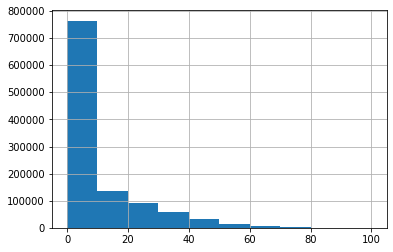

In [37]:
df_artists['popularity'].hist()

In [38]:
df_artists['popularity'].value_counts().sort_values(ascending=False).head(15)

0     467416
1      74593
2      47594
3      36371
4      29567
5      26680
6      23735
7      21119
8      19592
9      17615
10     16761
11     15795
12     15047
13     14393
14     13586
Name: popularity, dtype: int64

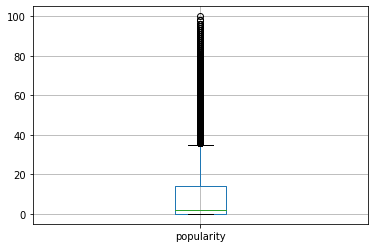

In [39]:
df_artists.boxplot(column=['popularity'])

In [40]:
q1 = df_artists['popularity'].quantile(0.25)
q3 = df_artists['popularity'].quantile(0.75)

IQR = q3 - q1

popularity_outliers = q3 + 1.5 * IQR
popularity_outliers

35.0

In [41]:
len(df_artists[df_artists['popularity'] >= 35.0])

82156

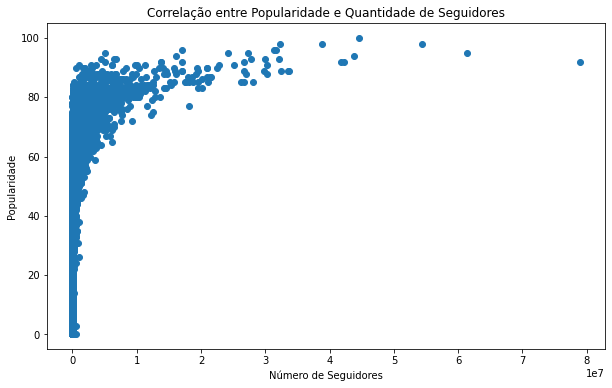

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(df_artists['followers'], df_artists['popularity'])

plt.title('Correlação entre Popularidade e Quantidade de Seguidores')
plt.xlabel('Número de Seguidores')
plt.ylabel('Popularidade');

In [43]:
df_artists.loc[df_artists['popularity'] == 100]

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973,"[canadian pop, pop, post-teen pop]",Justin Bieber,100


**Conclusões**

1.   Observa-se que a Popularidade é um item que varia de 0 a 100 no dataset
2.   Como é de se esperar, quanto maior o número de Seguidores, maior a Popularidade do Artista
3.   O artista com maior popularidade (Justin Bieber), porém, não é o artista com maior nº de Seguidores (mas está no 3º quartil em nº de Seguidores, tendo 44 milhões)
4.   75% de todos os artistas do dataset possuem uma Popularidade até 14, o que indica que o dataset é composto por artistas que, em sua maioria, possuem baixa Popularidade
5.   82.156 artistas são outliers, considerando a Popularidade






# DataFrame **Tracks**

In [44]:
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [45]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

'NAME' É A ÚNICA COLUNA COM VALORES NaN

In [46]:
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [47]:
df_tracks[df_tracks.duplicated()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [48]:
# Antes de tudo, vamos ordenar o df_tracks de acordo com o nome de cada faixa

df_tracks.sort_values(by='name').reset_index(drop=True, inplace=True)

MATRIZ DE CORRELAÇÃO DENTRE AS VARIÁVEIS DO *df_tracks*

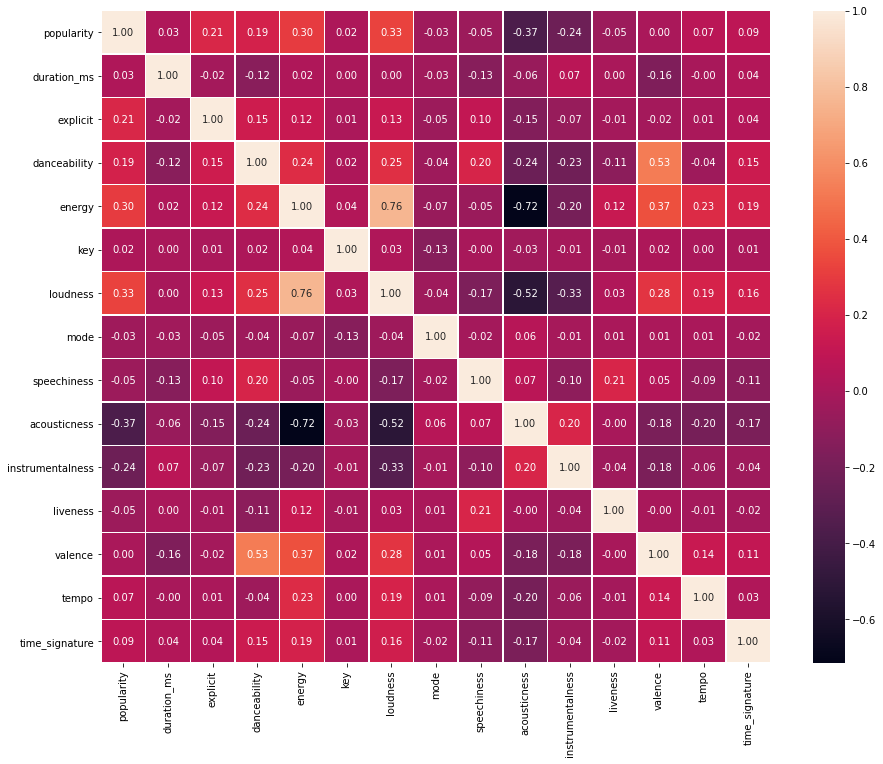

In [49]:
matrix_tracks = df_tracks.corr()
plt.figure(figsize=(15,12))
sns.heatmap(matrix_tracks, annot=True, linewidths=0.5, fmt=".2f")

**Interpretando a correlação de Pearson**

*   0.9 [+ ou -] indica correlação muito forte
*   0.7 a 0.9 [+ ou -] indica correlação forte
*   0.5 a 0.7 [+ ou -] indica correlação moderada
*   0.3 a 0.5 [+ ou -] indica correlação fraca
*   0 a 0.3 [+ ou -] indica correlação desprezível






In [50]:
rel = matrix_tracks.unstack().sort_values().drop_duplicates()
negative_rel = rel.loc[rel < -0.5]
positive_rel = rel.loc[(rel > 0.5) & (rel != 1)]

In [51]:
negative_rel

energy        acousticness   -0.715412
acousticness  loudness       -0.519423
dtype: float64

In [52]:
positive_rel

valence  danceability    0.528150
energy   loudness        0.764735
dtype: float64

**Conclusões:**

1.   *Acousticness* tem uma correlação negativa com *loudness* (moderada) e *energy* (forte)
2.   Existe uma correlação positiva entre *valence* e *danceability* (moderada) e entre *energy* e *loudness* (forte)

# - track id: *hash* que identifica a faixa

In [53]:
df_tracks['id'].nunique()

586672

In [54]:
type(df_tracks['id'][0])

str

In [55]:
# O Dtype da coluna será convertido para String, para ser usado nas próximas etapas

df_tracks['id'] = df_tracks['id'].astype('string')

**Conclusões:**

1.   Cada faixa possui um id único

# - track name: nome da faixa/música

TRATANDO VALORES FALTANTES

In [56]:
df_tracks.loc[df_tracks['name'].isnull()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


In [57]:
df_tracks.loc[df_tracks['name'].isnull(), 'id_artists'].unique()

array(["['0LyfQWJT6nXafLPZqxe9Of']"], dtype=object)

In [58]:
df_artists.loc[df_artists['id'] == "0LyfQWJT6nXafLPZqxe9Of"]

,id,followers,genres,name,popularity


In [59]:
df_tracks.dropna(subset=['name'], inplace=True)

*   Foram identificadas 71 canções de um único artista com valores faltantes no dataset
*   Este artista, porém, não existe no *df_artists*, e, portanto, estas canções foram excluídas do dataset


RETIRANDO MÚSICAS COM MESMOS NOME E ARTISTA DO DATASET

In [60]:
for word in [' - ', 'Radio Edit', 'Single Version', 'Remix', 'Remaster', 'Remastered', 'Remasterizado', 'Ao Vivo', 'Live']:
  df_tracks['name'] = df_tracks['name'].str.replace(word, "")

In [61]:
df_tracks[df_tracks.duplicated(subset=['name', 'id_artists'])]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
121,5cUFFY2Atw4QeFitueQCt2,El Huerfanoizado,0,159800,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.366,0.0749,7,-26.340,1,0.0806,0.99600,0.924000,0.1170,0.515,90.969,3
230,5eXOIVUkW17FqnEoLR2wTX,Stardust,5,213667,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1923,0.614,0.2980,3,-11.004,0,0.0541,0.97000,0.646000,0.0514,0.772,122.319,4
398,2gFUqcLFUDVXcWmeKAOnGd,Pobre Cotorroizado,0,171107,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1923-03-29,0.502,0.2980,5,-15.321,0,0.0805,0.99500,0.919000,0.2850,0.510,135.238,4
511,4Q5I6riVFNV4mJaqSCmB0C,Basin Street Bluesrec. 1928,4,207000,0,['Louis Armstrong & His Hot Five'],['0t4VVR2T9Sb0z3NdDdEU6S'],1923,0.604,0.2790,10,-11.588,1,0.0446,0.98600,0.237000,0.2750,0.594,123.271,4
719,0OJgo5mwk8SirgbF8Ht4lA,Juan de los Santos Arenaizado,0,144253,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1924-03-29,0.408,0.1980,4,-23.185,1,0.0552,0.98000,0.900000,0.1140,0.150,120.807,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586602,3fSZR3szZHnFQkpMFzwDNF,我在呢,45,216931,0,['TANK 呂建忠'],['39LWbzZB6lcrRviPzrAVdZ'],2018-08-02,0.577,0.4470,1,-6.458,1,0.0394,0.59200,0.000000,0.1070,0.318,119.905,4
586604,11DUHbs4Vu8M7ppePmszse,誰,45,251077,0,['Yo Lee'],['1D2LuIU6rgg0MGa0l8wYJh'],2018-08-31,0.468,0.2600,1,-9.757,1,0.0386,0.69400,0.000000,0.1090,0.214,128.579,4
586637,1HpzOCZbNWzxvvXfSGtSrX,Find U Again (feat. Camila Cabello),64,176417,0,"['Mark Ronson', 'Camila Cabello']","['3hv9jJF3adDNsBSIQDqcjp', '4nDoRrQiYLoBzwC5Bh...",2019-05-30,0.605,0.6640,8,-7.162,1,0.0316,0.00548,0.000003,0.2040,0.164,103.997,4
586646,0F2muCxmWhi7NfY9poM0KZ,至少我還記得天堂的微笑插曲,44,304800,0,['Eric Chou'],['5fEQLwq1BWWQNR8GzhOIvi'],2019-01-10,0.269,0.3680,10,-10.436,1,0.0339,0.72400,0.000003,0.1110,0.337,168.803,4


In [62]:
df_tracks.drop_duplicates(subset=['name', 'id_artists'], inplace=True)

In [63]:
len(df_tracks)

524621

**Conclusões:**

1.   Excluimos 71 canções sem nome, de um artista que não existe no *df_artists*
2.   Ainda excluimos mais de 60.000 faixas que estavam repetidas, caso consideremos nome da faixa e id do artista

# - tracks popularity: popularidade das faixas

In [64]:
df_tracks['popularity'].describe()

count    524621.000000
mean         27.465338
std          18.322955
min           0.000000
25%          13.000000
50%          27.000000
75%          40.000000
max         100.000000
Name: popularity, dtype: float64

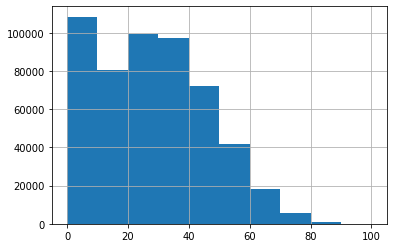

In [65]:
df_tracks['popularity'].hist()

In [66]:
df_tracks['popularity'].value_counts().sort_values(ascending=False)

0      39805
35     11038
23     11034
1      10692
36     10691
       ...  
97         2
99         1
95         1
98         1
100        1
Name: popularity, Length: 101, dtype: int64



*   Vamos comparar a popularidade das faixas, com a popularidade dos seus respectivos cantores
*   Para isso, vamos unir os dois DataFrames, através do comando *merge()*



PREPARANDO OS DATASETS PARA O MERGE

*   Antes de unir os DataFrames, vamos transformar a coluna *id_artists* em uma lista, da mesma forma que fizemos com a coluna de *genres*, no *df_artists*
*   Também vamos excluir os eventuais duplicados que forem gerados deste processo
*   OBS.: Este DataFrame resultante será utilizado em outras partes desta análise





In [67]:
for char in ["[", "]", "'", "\""]:
  df_tracks['id_artists'] = df_tracks['id_artists'].str.replace(char, "")
df_tracks['id_artists'] = df_tracks['id_artists'].str.split(", ")

In [68]:
df_tracks_exploded = df_tracks.explode('id_artists')
df_tracks_exploded.rename(columns={'id' : 'id_track', 'id_artists' : 'id_artist', 'name' : 'track'}, inplace = True)

df_artists_exploded = df_artists.explode('genres')
df_artists_exploded.rename(columns={'id' : 'id_artist', 'name' : 'artist', 'genres' : 'genre'}, inplace = True)

EXCLUSÃO DE EVENTUAIS ITENS DUPLICADOS

In [69]:
df_tracks_exploded.drop_duplicates(subset=['id_track', 'id_artist'], inplace=True)

In [70]:
df_artists_exploded.drop_duplicates(subset=['id_artist', 'genre'], inplace=True)

UNIÃO DOS DATAFRAMES

In [71]:
df_merged = df_tracks_exploded.merge(df_artists_exploded, how='left', on="id_artist", suffixes=('_track', '_artist'), indicator=True)

In [72]:
df_merged.loc[df_merged.artist.isnull()]

,id_track,track,popularity_track,duration_ms,explicit,artists,id_artist,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genre,artist,popularity_artist,_merge
25599,0VHoDqq7N5VH1UX93Mdyfj,Air,0,268400,0,"['n/a', 'Johann Sebastian Bach', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935,0.317,0.317,2,-8.978,1,0.0389,0.975000,0.95600,0.0868,0.1290,66.296,4,NaN,NaN,NaN,NaN,left_only
25675,0cSyeb33PyBMtLeUzCgDgO,concerto piccolo,0,279600,0,"['n/a', 'Nitsch, Johannes', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935,0.535,0.435,4,-9.021,0,0.0303,0.732000,0.25300,0.1190,0.2050,106.124,4,NaN,NaN,NaN,NaN,left_only
25962,1GYoPjJvGyYufhbxZmAKmF,drume negrita,0,182400,0,"['n/a', 'Grenet, Ernesto', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935,0.628,0.661,0,-7.634,1,0.0387,0.254000,0.23600,0.0572,0.8050,96.198,4,NaN,NaN,NaN,NaN,left_only
26811,2nUaz5sLG0HccdACC1IG35,i know that my redeemer liveth,0,236733,0,"['n/a', 'Händel, Georg Friedrich (DP)', 'In Mo...",2pKBejGoRlzAc5VHQ0R26E,1935,0.492,0.286,3,-8.966,1,0.0336,0.981000,0.89200,0.1430,0.2730,87.973,3,NaN,NaN,NaN,NaN,left_only
26817,2oYfdKTcUpk3xJZm0CkHJm,summertime,0,246667,0,"['n/a', 'George Gershwin', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935,0.341,0.424,9,-8.983,0,0.0305,0.867000,0.81200,0.1600,0.2640,151.676,4,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026986,44tvGaqisGSy4Qy45vd0CF,Thousand Pieces (FYHYM2019),1,83477,0,"['A & Z', 'Claudiu Adam', 'Clara Yates']",5Ny5rgjblitALAHGH2ICG0,2020-01-05,0.393,0.997,1,-6.145,0,0.1450,0.000239,0.00268,0.7560,0.0639,137.938,4,NaN,NaN,NaN,NaN,left_only
2027020,65hdygJXXOBGKS76EKvxth,醒不来的梦,50,232297,0,['回小仙'],27kWsk6mk6DeqQhdOHsyej,2020-09-29,0.744,0.605,5,-5.830,0,0.0318,0.497000,0.00000,0.3940,0.4710,108.012,4,NaN,NaN,NaN,NaN,left_only
2027023,7JWoMpoxEl3pZ2CLZxM6ms,天空之外,49,367192,0,['解语花'],5SWFVqjJ5POFRF6cudSL3X,2020-01-19,0.617,0.220,6,-13.004,1,0.0301,0.580000,0.00483,0.4200,0.2430,124.990,4,NaN,NaN,NaN,NaN,left_only
2027032,4ow9HehIdFii1cggylW2k0,四季予你DJ版,47,156393,0,"['程響', '阿卓']",7g8hOWXtGS16J30CMU1SR7,2020-12-29,0.677,0.970,0,-3.388,0,0.0446,0.134000,0.00234,0.3020,0.9080,140.026,4,NaN,NaN,NaN,NaN,left_only


In [73]:
df_merged.drop_duplicates(subset=['track', 'id_artist', 'genre'], inplace=True)

*   OBS.: Este DataFrame *df_merged* será usado para a criação do modelo
*   Nesta fase, provavelmente, excluiremos, também, as duplicidades geradas para as tracks (restando apenas um registro para cada faixa, com um único artista e gênero)

**Conclusões:**

1.   Com o *merge 'left'*, existirão músicas sem artista (e, consequentemente, sem Gênero)
2.   Porém, no próprio *df_artists*, existem, também, artistas sem Gênero (not specified)
3.   Isso deve ser levado em consideração, caso tais itens sejam mantidos no DataFrame

In [74]:
df_merged_sample = df_merged.sample(frac=0.01)

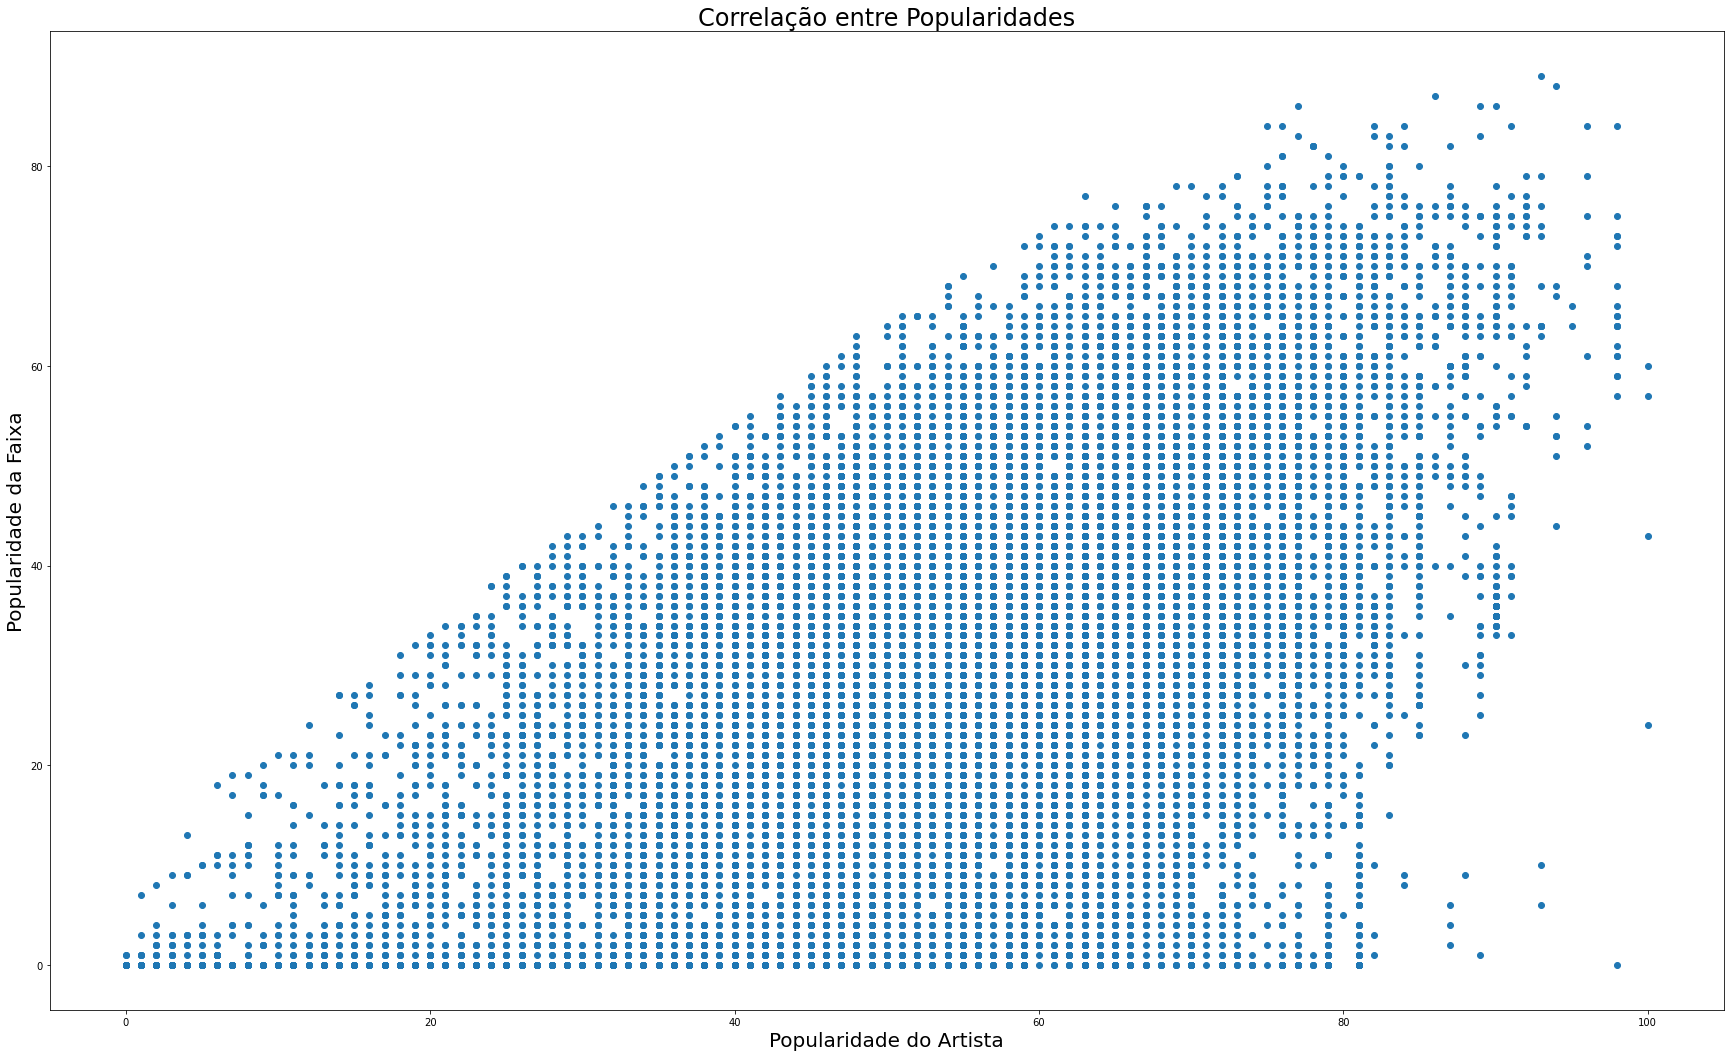

In [75]:
plt.figure(figsize=(30,18))
plt.scatter(df_merged_sample['popularity_artist'], df_merged_sample['popularity_track'])

plt.title('Correlação entre Popularidades', fontsize=24)
plt.xlabel('Popularidade do Artista', fontsize=20)
plt.ylabel('Popularidade da Faixa', fontsize=20);

In [76]:
# Artistas de Alta Popularidade com Canções de Baixa Popularidade

df_merged.loc[(df_merged['popularity_artist'] >= 90) & (df_merged['popularity_track'] == 0),
              ['track', 'popularity_track', 'artist', 'popularity_artist']].groupby("track").first().head()

,popularity_track,artist,popularity_artist
track,,,
4x,0,DaBaby,93.0
Baila Conmigo,0,Rauw Alejandro,93.0
Be Alright,0,Justin Bieber,100.0
Beautiful Goodbye,0,Maroon 5,91.0
Catching Feelings,0,Justin Bieber,100.0


In [77]:
# Artistas e Canções de Alta Popularidade

df_merged.loc[(df_merged['popularity_artist'] >= 90) & (df_merged['popularity_track'] >= 90),
              ['track', 'popularity_track', 'artist', 'popularity_artist']].groupby("track").first().head()

,popularity_track,artist,popularity_artist
track,,,
34+35,91,Ariana Grande,95.0
Anyone,90,Justin Bieber,100.0
Baila Conmigo (with Rauw Alejandro),90,Rauw Alejandro,93.0
Bandido,94,Myke Towers,95.0
Beautiful Mistakes (feat. Megan Thee Stallion),90,Maroon 5,91.0


In [78]:
# Artistas de Baixa Popularidade com Canções de Alta Popularidade

df_merged.loc[(df_merged['popularity_artist'] == 0) & (df_merged['popularity_track'] >= 70), 
              ['track', 'popularity_track', 'artist', 'popularity_artist']].groupby("track").first().head()

,popularity_track,artist,popularity_artist
track,,,


In [79]:
# Artistas e Canções de Baixa Popularidade

df_merged.loc[(df_merged['popularity_artist'] == 0) & (df_merged['popularity_track'] == 0), 
              ['track', 'popularity_track', 'artist', 'popularity_artist']].groupby("track").first().head()

,popularity_track,artist,popularity_artist
track,,,
"""Anne-Marie Stretter, Lol V. Stein...""",0,Jean Marc Turine,0.0
"""Je suis née en Indochine""",0,Jean Marc Turine,0.0
"""L'Immoraliste""",0,André Gide,0.0
"""Les Faux-monnayeurs"": Composition...",0,André Gide,0.0
"""Les nourritures terrestres""",0,André Gide,0.0


**Conclusões II:**

4.   Existem artistas de alta popularidade com canções de baixa - e alta! - popularidades
5.   O contrário, porém, não é verdadeiro, pois, artistas de baixa popularidade só possuem canções de baixa popularidade






IMPORTANTE!

*   A partir deste ponto, temos os DataFrames originais, bem como o *df_merged*, usado p/ fazer correlações
*   O *df_merged* será usado para construção do modelo
*   Para análise das features individualmente, continuaremos usando os DataFrame originais


# - track duration_ms: duração da música em milissegundos

IDENTIFICANDO OS OUTLIERS

In [80]:
duration_timestamp = pd.to_datetime(df_tracks['duration_ms'], unit='ms')

In [81]:
duration_timestamp.describe(datetime_is_numeric=True)

count                           524621
mean     1970-01-01 00:03:49.396016099
min                1970-01-01 00:00:04
25%         1970-01-01 00:02:53.627000
50%         1970-01-01 00:03:34.027000
75%         1970-01-01 00:04:23.467000
max         1970-01-01 01:33:41.218000
Name: duration_ms, dtype: object

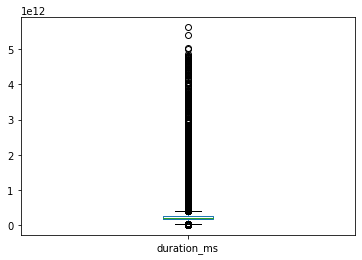

In [82]:
duration_timestamp.astype(int).plot.box()

In [83]:
df_tracks.loc[df_tracks['duration_ms'] == df_tracks['duration_ms'].min()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1291,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,['Louis Armstrong'],[19eLuQmk9aCobbVDHc6eek],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [84]:
# Faixas com menos de 1 minuto de duração

df_tracks.loc[df_tracks['duration_ms'] < 60000].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
106,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,['Uli'],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.657,0.3250,10,-14.319,0,0.2540,0.1990,0.856000,0.0931,0.105,81.944,5
1291,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,['Louis Armstrong'],[19eLuQmk9aCobbVDHc6eek],1925,0.000,0.0000,0,-60.000,0,0.0000,0.0000,0.000000,0.0000,0.000,0.000,0
2777,6Gb9wRpZp6p0VYuMBxuFHH,Past Ice and Ice and Even More,0,51149,0,['Future Rapper'],[2la3t6tT3UzEJaENsqudLP],1926-10-03,0.151,0.2790,1,-7.713,1,0.0340,0.0068,0.000066,0.1880,0.461,81.184,4
4170,1IW9ryxKdvWxINpv4SwhEr,"Kinderszenen, Op. 15: IV. Bittendes Kind",0,56507,0,"['Robert Schumann', 'Vladimir Horowitz']","[2UqjDAXnDxejEyE0CzfUrZ, 4Ws5hSoABAwvGJ4LhHwHgq]",1928,0.386,0.0076,2,-30.032,1,0.0422,0.9960,0.883000,0.1400,0.609,76.125,1
4191,1UOb4CrTEjQZAqD74HCFMJ,"Preludes: Op. 11, No. 14 in E-Flat Minor",0,57333,0,"['Alexander Scriabin', 'Vladimir Horowitz']","[6nZiWg5ZB511S24WmB7TCV, 4Ws5hSoABAwvGJ4LhHwHgq]",1928,0.316,0.3880,8,-14.338,0,0.0380,0.9930,0.912000,0.1230,0.456,79.385,4


In [85]:
df_tracks.loc[df_tracks['duration_ms'] == df_tracks['duration_ms'].max()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
326329,3EEv9UCeZdn4MVFv8tsO1E,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,3,5621218,0,['ท่านพุทธทาส'],[2ySk9zib3PuomvMGmCqdTA],1979-07-28,0.638,0.537,8,-13.365,1,0.775,0.825,0.0,0.345,0.401,131.446,3


In [86]:
# Faixas acima de 20 minutos de duração

df_tracks.loc[df_tracks['duration_ms'] > 1200000].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1127,2Pu2Hv2NnitI7yxc3rHQzf,Death and Transfiguration,0,1335000,0,"['Richard Strauss', 'Karl Böhm', 'Staatskapell...","[6pAwHPeExeUbMd5w7Iny6D, 3fyr5uksidSlLzsUjRIz5...",1924-12-31,0.1080,0.183,7,-16.348,1,0.0348,0.972,0.901,0.1070,0.0369,91.171,3
5408,6pRh92RIJ9I4o1IZo9JCqo,Tod und Verklärung Op. 24,0,1450347,0,"['Richard Strauss', 'London Philharmonic Orche...","[6pAwHPeExeUbMd5w7Iny6D, 3PfJE6ebCbCHeuqO4BfNeA]",1929,0.0965,0.129,7,-16.723,1,0.0375,0.959,0.933,0.0897,0.0338,76.544,3
5525,6Zy82cYdN3x9ktUpQxHydk,"Piano Sonata in B Minor, S. 178",15,1803280,0,"['Franz Liszt', 'Vladimir Horowitz']","[1385hLNbrnbCJGokfH2ac2, 4Ws5hSoABAwvGJ4LhHwHgq]",1930,0.3100,0.220,6,-16.664,1,0.0428,0.979,0.868,0.1620,0.0634,79.903,4
6596,0bIuxZqqFor0FWIexwWjqh,N'ecoutez Pas Mesdames,0,1856960,0,['Sacha Guitry'],[5WxFNZUj28Pvf9fsOivG5F],1931,0.5220,0.240,8,-25.380,1,0.8610,0.766,0.000,0.1060,0.3560,77.297,4
8025,7M2tLKFG4LJEx0rd0NqFAu,Anslag,0,3093226,0,['Portugallien'],[18LbUxlDiDSNFm1HREKWqL],1932,0.0644,0.132,3,-37.943,1,0.0583,0.993,0.962,0.1440,0.0357,72.482,4


In [87]:
len(df_tracks.loc[df_tracks['duration_ms'] > 1200000])

1024

In [88]:
len(df_tracks.loc[df_tracks['duration_ms'] < 60000])

6573

**Conclusões:**

1.   A média de duração das músicas do dataset é de 03min50s.
2.   75% das canções possuem até 04min23s.
3.   A faixa de maior duração do dataset possui 01h33min41s, chama-se โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต, que em Português significa "A estrutura daquilo que se chama de Vida", e, na verdade, trata-se de uma palestra







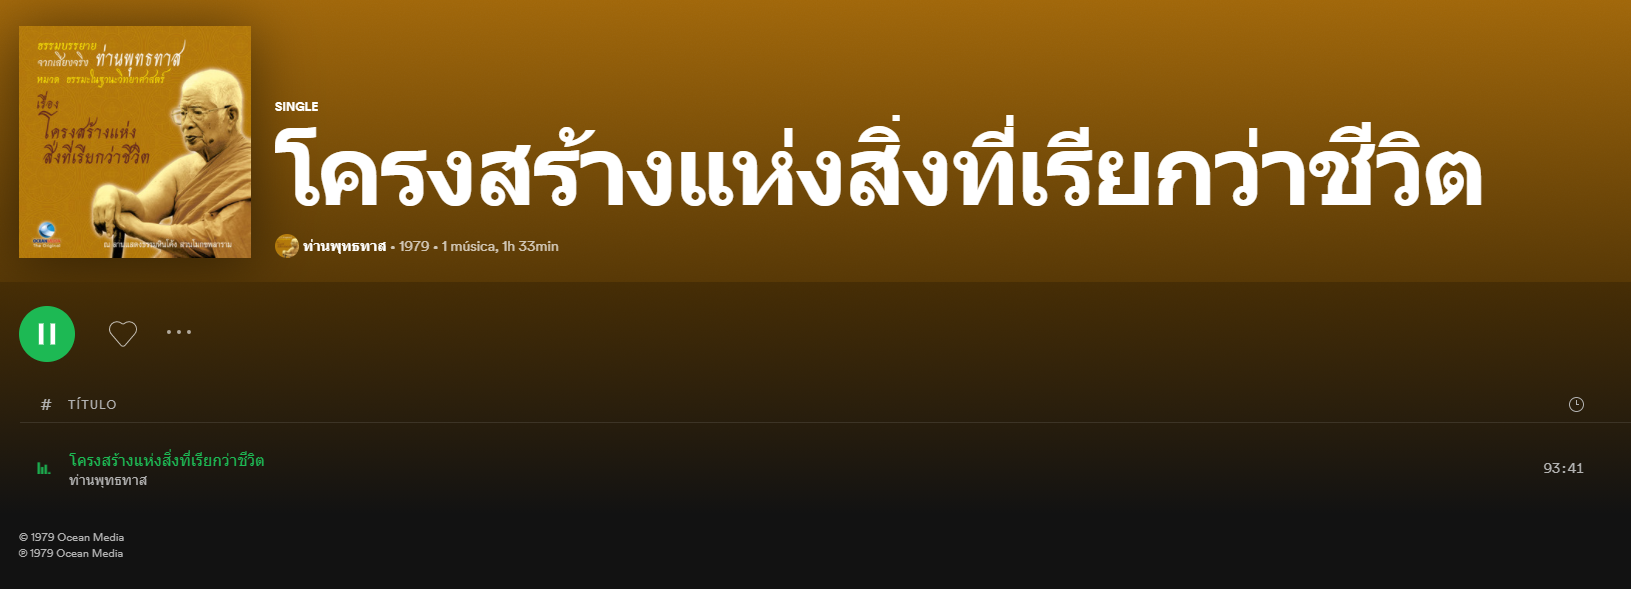



4.   Levando isso em consideração, identificamos que no DataFrame Tracks, também estão relacionadas itens diferentes de música, em formato de faixas (palestras, álbuns inteiros, concertos etc)
5.   Vamos excluir do DataFrame todos os itens que não consideramos músicas, pois levarão a erro no futuro modelo
6.   Considerando o atributo de duração individualmente, vamos entender 
como música todos os itens que possuem entre 01min30s de 20 minutos
7.   Existem 1024 registros com duração superior a 20 minutos e 7182 com menos de 1 minuto.





EXCLUINDO AS FAIXAS FORA DOS LIMITES ESTABELECIDOS

In [89]:
df_tracks.drop(df_tracks[df_tracks['duration_ms'] < 60000].index, inplace = True)
df_tracks.drop(df_tracks[df_tracks['duration_ms'] > 1200000].index, inplace = True)

CONVERTENDO A COLUNA DE MILISSEGUNDOS P/ MINUTOS

In [90]:
df_tracks['duration_ms'] = duration_timestamp.apply(lambda x : x.strftime('%H:%M:%S'))

In [91]:
df_tracks.rename(columns={'duration_ms' : 'duration'}, inplace = True)

REPLICANDO AS ALTERAÇÕES NO *DF_TRACKS_EXPLODED* E *DF_MERGED*

In [92]:
df_merged.drop(df_merged[df_merged['duration_ms'] < 60000].index, inplace = True)
df_merged.drop(df_merged[df_merged['duration_ms'] > 1200000].index, inplace = True)

df_tracks_exploded.drop(df_tracks_exploded[df_tracks_exploded['duration_ms'] < 60000].index, inplace = True)
df_tracks_exploded.drop(df_tracks_exploded[df_tracks_exploded['duration_ms'] > 1200000].index, inplace = True)

In [93]:
duration_timestamp = pd.to_datetime(df_merged['duration_ms'], unit='ms')
df_merged['duration_ms'] = duration_timestamp.apply(lambda x : x.strftime('%H:%M:%S'))

duration_timestamp = pd.to_datetime(df_tracks_exploded['duration_ms'], unit='ms')
df_tracks_exploded['duration_ms'] = duration_timestamp.apply(lambda x : x.strftime('%H:%M:%S'))

In [94]:
df_merged.rename(columns={'duration_ms' : 'duration'}, inplace = True)
df_tracks_exploded.rename(columns={'duration_ms' : 'duration'}, inplace = True)

# - explicit track: indica se uma música tem conteúdo explícito ou não



*   0 - sem conteúdo explícito
*   1 - com conteúdo explícito



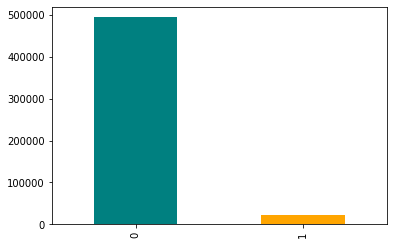

In [95]:
# Plot das faixas explícitas no DataFrame original, df_tracks

df_tracks['explicit'].value_counts().plot(kind='bar', color=['teal', 'orange'])

In [96]:
explicit_songs = df_merged.loc[df_merged['explicit'] == 1]

In [97]:
len(explicit_songs)

109596

In [98]:
explicit_songs.groupby('genre').size().sort_values(ascending=False).head(50)

genre
rap                    4970
hip hop                4396
pop rap                3207
gangster rap           2511
not specified          2248
trap                   2003
southern hip hop       1829
trap latino            1602
pop                    1489
czsk hip hop           1444
french hip hop         1397
hardcore hip hop       1377
russian hip hop        1359
italian hip hop        1355
dance pop              1349
pop urbaine            1305
reggaeton              1284
east coast hip hop     1203
latin                  1141
latin hip hop           894
dutch hip hop           853
german hip hop          852
west coast rap          837
r&b                     805
rap francais            779
russian trap            771
alternative metal       764
reggaeton flow          749
rock                    710
dirty south rap         705
tropical                673
dutch rap pop           670
atl hip hop             667
urban contemporary      666
nu metal                666
greek hip hop 

**Conclusões:**

1.   O dataset possui mais de 100.000 músicas com conteúdo explícito
2.   Os gêneros com mais músicas explícitas são rap, hip hop e seus subgêneros



# - track artists: artistas que cantam/participam da faixa

In [99]:
tracks_artists = df_tracks_exploded.groupby('artists')

In [100]:
tracks_artists.size().sort_values(ascending=False).head(50)

artists
['Die drei ???']                                                                                                                                                                                                                                                                                                                                                                 3782
['TKKG Retro-Archiv']                                                                                                                                                                                                                                                                                                                                                            2006
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']                                                                                                                                                                                                          

*   A coluna *artists* será removida do DataFrame ***df_merged***, visto que já temos a coluna *artist*, oriunda do DataFrame ***df_artists***



In [101]:
df_merged.drop(['artists'], axis = 1, inplace = True) 

**Conclusões:**

1.   Observa-se, com ajuda da coluna artists, que ainda possuimos mais itens no DataFrame Tracks que não se tratam de músicas, mas sim, de audiolivros divididos em faixas
2.   Chegamos a esta conclusão ao pesquisar, no próprio Spotify, pelos artistas com maior quantidade de faixas
3.   É provável que hajam, porém, mais faixas de audiolivros além daqueles cujos artistas são os de maior quantidade de faixas no DataFrame
4.   **IMPORTANTE: deve-se criar uma estratégia para limpar estes itens do dataset, para evitar que o modelo os leve em consideração**

# - track id_artists: id dos artistas que cantam/participam da faixa

*   A coluna *id_artist* foi usada para segregar o *df_tracks*, pois, para cada faixa do DataFrame, existiam mais de um artista em vários registros

In [102]:
tracks_id_artists = df_tracks_exploded.groupby('id_artist')

In [103]:
tracks_id_artists.size().sort_values(ascending=False).head(50)

id_artist
3meJIgRw7YleJrmbpbJK6S    3782
61JrslREXq98hurYL2hYoc    2016
0i38tQX5j4gZ0KS3eCMoIl    2006
2maQMqxNnlRrBrS1oAsrX9    1980
4NJhFmfw43RLBLjQvxDuRS    1656
5aIqB5nVVvmFsvSdExz408    1522
3t2iKODSDyzoDJw7AsD99u    1166
1l6d0RIxTL3JytlLGvWzYe    1166
0gXDpqwYNDODn7fB0RDN8J    1165
2ae6PxICSOZHvjqiCcgon8    1061
2wOqMjp9TyABvtHdOSOTUS    1038
003f4bk13c6Q3gAUXv7dGJ    1027
5as8A4G47Ohu9NSWs3Je8U    1002
1JOQXgYdQV2yfrhewqx96o     968
5V0MlUE1Bft0mbLlND7FJz     938
0aFGod7DM6b3O5l1AmvFwK     930
2x8vG4f0HYXzMEo3xNsoiI     899
4eeMulNeqpZGBxybCxZOdC     838
0GF4shudTAFv8ak9eWdd4Y     821
66pXJ6MhX37ZLneiwUWZf3     796
7y97mc3bZRFXzT2szRM4L4     780
7JdPe4gzrYmbcko3FTav57     759
1Mxqyy3pSjf8kZZL4QVxS0     740
0OzxPXyowUEQ532c9AmHUR     733
1hD52edfn6aNsK3fb5c2OT     716
0bjdfjE8XbLa2Odstu6E1E     623
43ZHCT0cAZBISjO8DG9PnE     623
3gacryguGmpmCvgPGt2CBI     600
3UYZxxxrntUxxEeRycqHvq     576
13dkPjqmbcchm8cXjEJQeP     566
1YzCsTRb22dQkh9lghPIrp     562
2LmyJyCF5V1eQyvHgJNbTn     55

*   Observe que o agrupamento entre *artists* gera um resultado diferente daquele feito com base no *id_artists*
*   Isto porque o DataFrame *df_tracks* foi dividido em relação aos ids de artista que estavam em lista, e daí surgiu o *df_tracks_exploded*
*   Assim, no agrupamento feito com base no *id_artists*, estão mencionados separadamente os artistas que eventualmente possuem faixas em comum com algum outro cantor





# - track release date: data de lançamento da faixa

PADRONIZANDO A COLUNA COM O ANO DE LANÇAMENTO




In [104]:
release = pd.to_datetime(df_tracks['release_date'])

In [105]:
df_tracks['release_date'] = release.apply(lambda x : x.year)

In [106]:
df_tracks.rename(columns={'release_date' : 'release_year'}, inplace = True)

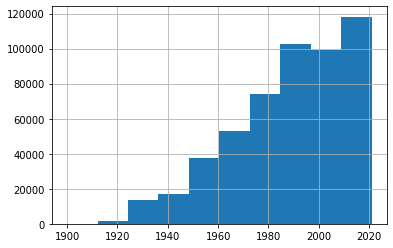

In [107]:
df_tracks['release_year'].hist()

REPLICANDO AS ALTERAÇÕES NO *DF_TRACKS_EXPLODED* E *DF_MERGED*

In [108]:
release = pd.to_datetime(df_tracks_exploded['release_date'])
df_tracks_exploded['release_date'] = release.apply(lambda x : x.year)
df_tracks_exploded.rename(columns={'release_date' : 'release_year'}, inplace = True)

In [109]:
release = pd.to_datetime(df_merged['release_date'])
df_merged['release_date'] = release.apply(lambda x : x.year)
df_merged.rename(columns={'release_date' : 'release_year'}, inplace = True)

DIVIDINDO AS FAIXAS DE ACORDO COM AS DÉCADAS

In [110]:
decades = range(1920, 2030, 10)

tracks_by_decades = {}
for d in decades:
  years = f'the_{str(d)}s'
  df = df_tracks.loc[(df_tracks["release_year"] >= d) & (df_tracks["release_year"] < ( d+10 ))]
  tracks_by_decades.update({ years : df })

In [111]:
for years, df in tracks_by_decades.items():
  print(years)

  df_by_genre = df_merged.loc[(df_merged['release_year'] >= df['release_year'].min()) 
                            & (df_merged['release_year'] <= df['release_year'].max())
                            & (df_merged['genre'] != 'not specified')]

  print(f'Possui {len(df)} faixas')
  print(f'Média Popularidade das Faixas: {round(df["popularity"].mean(), 2)}')
  print(f'Gêneros mais comuns: {df_by_genre.groupby("genre").size().sort_values(ascending=False).head()}')
  print(f'*OBS.: O somatório dentre os gêneros superará a quantidade de faixas totais, pois a busca por gêneros conta mais de uma vez cada faixa por artista e gênero\n')

the_1920s
Possui 6714 faixas
Média Popularidade das Faixas: 0.98
Gêneros mais comuns: genre
vintage tango    1619
tango            1579
vintage jazz     1026
big band          711
swing             655
dtype: int64
*OBS.: O somatório dentre os gêneros superará a quantidade de faixas totais, pois a busca por gêneros conta mais de uma vez cada faixa por artista e gênero

the_1930s
Possui 11644 faixas
Média Popularidade das Faixas: 1.91
Gêneros mais comuns: genre
big band         1627
swing            1603
vintage tango    1440
classical        1139
tango            1137
dtype: int64
*OBS.: O somatório dentre os gêneros superará a quantidade de faixas totais, pois a busca por gêneros conta mais de uma vez cada faixa por artista e gênero

the_1940s
Possui 15092 faixas
Média Popularidade das Faixas: 1.92
Gêneros mais comuns: genre
classical                3927
classical performance    2598
classic bollywood        1789
filmi                    1581
swing                    1307
dtype: int64

**Conclusões:**


1.   A quantidade de faixas disponíveis no dataset aumentam proporcionalmente conforme a passagem dos anos (as últimas décadas possuem mais registros do que das décadas antigas)
2.   Referente à evolução dos gêneros musicais:


> Nas décadas de 20 e 30 eram mais comuns as músicas de tango;


> Entre os anos 40 e 50, as músicas mais clássicas e o jazz estavam em voga;


> O rock começou a tomar protagonismo nos anos 60, e dominou até os anos 80, começando a dar espaço para outros gêneros a partir dos anos 90


> Nos anos 90, a música latina começou a ganhar espaço, e vem em destaque até os dias atuais


> A partir dos anos 2000, o dance pop começou a ganhar mais espaço, e até hoje ocupa espaço no pódio da maior quantidade de faixas

# - track danceability : indica o quão dançante é uma faixa

*   Valores variam entre 0.0 até 1.0
*   Baseado em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, intensidade da batida e regularidade geral



# - track energy : mede a intensidade e atividade da faixa

*   Valores variam entre 0.0 até 1.0
*   As características que contribuem para este atributo incluem: dinâmica da faixa, intensidade percebida, timbre, taxa de início e entropia geral

# - track key : chave musical à qual cada faixa pertence

*   Números inteiros indicando um valor padrão na notação Pitch Class
*   Por exemplo: 0 = C, 1 = C♯/D♭, 2 = D, e assim por diante



# - track loudness :  volume geral de uma faixa medido em decibéis (dB)

*   Valores geralmente variam entre -60 e 0 db.

# - track mode : modo da faixa (maior ou menor)

*   0 - modo menor
*   1 - modo maior

# - track speechiness : o quão 'falada' é uma faixa

*   Valores variam de 0.0 até 1.0, sendo que:
*   Acima de 0,66: faixas que provavelmente são compostas inteiramente de palavras faladas
*   Entre 0,33 e 0,66: faixas que podem conter música e fala,  incluindo casos como música rap
*   Abaixo de 0,33: provavelmente representam música e outras faixas não semelhantes à fala






# - track acousticness : medida que indica a probabilidade da faixa ser acústica

*   Valores variam entre 0.0 até 1.0

# - track instrumentalness : medida que indica a probabilidade da faixa ser instrumental

*   Valores variam entre 0.0 até 1.0

# - track liveness : indica a probabilidade da faixa ser ao vivo, ou não

*   Valores variam entre 0.0 até 1.0
*   Identifica a presença ou ausência de uma platéia



# - track valence : descreve a positividade transmitida pela faixa

*   Valores variam entre 0.0 até 1.0
*   Alta valência indica faixas que soam mais positivas (por ex.: feliz, alegre, eufórico)
*   Faixas com baixa valência soam mais negativas (por ex.: triste, deprimido, com raiva)

# - track tempo : tempo geral estimado de uma faixa, em batidas por minuto (BPM)

*   Valor igual ou maior que 0
*   Velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do tempo



# - track time_signature : compasso geral da faixa

*   Convenção que especifica quantas batidas existem em cada barra (ou compasso)



# DataFrame **RelatedArtists**

In [112]:
related_artists

,id_artist,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0DheY5irMjBUeLybbCUEZ2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,0DlhY15l3wsrnlfGio2bjU,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,0DmRESX2JknGPQyO15yxg7,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,0DmhnbHjm1qw6NCYPeZNgJ,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,0Dn11fWM7vHQ3rinvWEl4E,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527363,1qDkZo6EZO7prhbTyh0kjE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
527364,52E1p1CjGZPzI8qdbIodGs,5BPsbp0hZTomLFlVTgdbuj,0qtCZoFConPbcPfkwtqpx6,0g3fnSe3212EM0H45zVQvr,6IllWwuEZXv8D8Z3zq41Uu,3UqGUvLLvbbxxpg2GUTwnL,7vhukwVHbJwCHgzaobUlXG,0jm2LG0drmDo48H3glziUD,6ejhJjv5gHGP3QwsY0bhL8,1qDkZo6EZO7prhbTyh0kjE,1Ok5pQBm58Sy8HD86lP9ji,0tD28H4LMua0acGEN1Bytg,0vtvMFEVjyZUkjZZjUN8Pw,114rf5BAHSpTOuHiHJ8AoH,2rjjDkYiXzWfGDwhkgtCwu,3cMoJnLJinh3xdO6OHuwE6,3qhVkLrZo0YV8HJKbVdCwC,3P3ctFURUm4yNRZeuvJzpv,3QqzpemmnuEXaCJo3MkPwq,4pWwoZtFdq4zPfyCMH10xs,4Rc8pP91qbI45rw3fLCeq5
527365,0yfrJ4JXXcChkrcFr5l8nN,70xqsSaFzoHsDjzaQnjvTW,02rbtsxmzmlWKtEZ4DLZr8,5BPsbp0hZTomLFlVTgdbuj,0g3fnSe3212EM0H45zVQvr,5E1U3plwlms90a9BBgVijN,0qtCZoFConPbcPfkwtqpx6,6IllWwuEZXv8D8Z3zq41Uu,4LFolM6aCwLIqzOS0soUp4,3UqGUvLLvbbxxpg2GUTwnL,3ibyUZTOuIA8X8r9M18dUY,1qDkZo6EZO7prhbTyh0kjE,103XEYtNA5jJRI49x3USJI,3VLXw7Phdo2mLlUoB5B59j,6n6VmhZHlbwcyxAMTHkfff,5J2sUIAE7PJNuPy6tbfGFF,2UmX87M1XsXn3p3mcabGN0,2zBogoEKvaZ8PoBASHBvzZ,6ejhJjv5gHGP3QwsY0bhL8,5iJ2SjQmyUNo68vLqqniAo,14UrUpszFj0N97hpFk7jyo
527366,6HvBQpMiWSkISfHF39vqXV,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [113]:
related_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527368 entries, 0 to 527367
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id_artist  527368 non-null  object
 1   0          405709 non-null  object
 2   1          405436 non-null  object
 3   2          405199 non-null  object
 4   3          405001 non-null  object
 5   4          404820 non-null  object
 6   5          404654 non-null  object
 7   6          404483 non-null  object
 8   7          404296 non-null  object
 9   8          404107 non-null  object
 10  9          403854 non-null  object
 11  10         403023 non-null  object
 12  11         402279 non-null  object
 13  12         401520 non-null  object
 14  13         400865 non-null  object
 15  14         400211 non-null  object
 16  15         399594 non-null  object
 17  16         398963 non-null  object
 18  17         398350 non-null  object
 19  18         397757 non-null  object
 20  19  